# INTRODUCTION

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Use magic function '%matplotlib inline' instead of 'plt.show()'

In [46]:
df=pd.read_excel('parking.xls')

In [47]:
df.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [48]:
df.tail()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
9055,FALLON,NV,ACTIVE,BUILDING,12,LEASED
9056,ELKO,NV,ACTIVE,BUILDING,2,LEASED
9057,LAS VEGAS,NV,ACTIVE,BUILDING,3,LEASED
9058,LAS VEGAS,NV,ACTIVE,BUILDING,24,LEASED
9059,LAS VEGAS,NV,ACTIVE,BUILDING,7,LEASED


In [49]:
df.shape

(9060, 6)

In [50]:
df.columns

Index(['Bldg City', 'Bldg State', 'Bldg Status', 'Property Type',
       'Total Parking Spaces', 'Owned/Leased'],
      dtype='object')

In [51]:
df.size

54360

In [52]:
df['Owned/Leased'].value_counts()

LEASED    6940
OWNED     2120
Name: Owned/Leased, dtype: int64

<BarContainer object of 9060 artists>

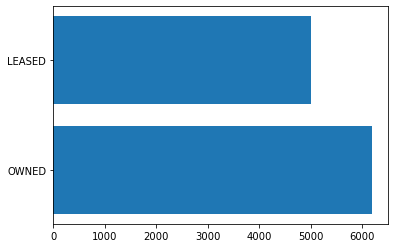

In [115]:
plt.barh(df['Owned/Leased'],df['Total Parking Spaces'])

#### Above, the graph is showing MAX values of Owned and Leased.

In [54]:
df['Bldg Status'].value_counts()

ACTIVE            8981
EXCESS              70
DECOMMISSIONED       9
Name: Bldg Status, dtype: int64

In [55]:
df['Bldg Status'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
9055    False
9056    False
9057    False
9058    False
9059    False
Name: Bldg Status, Length: 9060, dtype: bool

In [56]:
df.isnull().sum()

Bldg City               0
Bldg State              0
Bldg Status             0
Property Type           0
Total Parking Spaces    0
Owned/Leased            0
dtype: int64

In [57]:
df['Bldg Status'].isnull().sum()

0

In [58]:
df.describe()

,Total Parking Spaces
count,9060.000000
mean,51.708499
std,187.107773
min,0.000000
25%,0.000000
50%,8.000000
75%,40.000000
max,6198.000000


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9060 entries, 0 to 9059
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Bldg City             9060 non-null   object
 1   Bldg State            9060 non-null   object
 2   Bldg Status           9060 non-null   object
 3   Property Type         9060 non-null   object
 4   Total Parking Spaces  9060 non-null   int64 
 5   Owned/Leased          9060 non-null   object
dtypes: int64(1), object(5)
memory usage: 424.8+ KB


# OWNED/LEASED COUNT

In [127]:
owned_leased = pd.pivot_table(df,index='Owned/Leased',values='Total Parking Spaces', aggfunc='sum')

In [128]:
owned_leased

,Total Parking Spaces
Owned/Leased,
LEASED,310269
OWNED,158210


### Plotting using PANDAS:

<AxesSubplot:xlabel='Owned/Leased'>

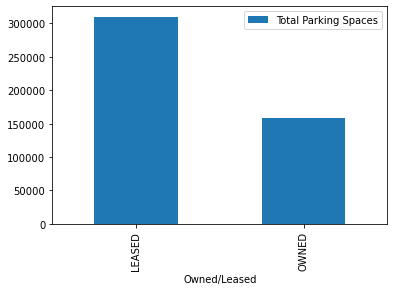

In [129]:
owned_leased.plot(kind='bar')

### Plotting using MATPLOTLIB:

<BarContainer object of 2 artists>

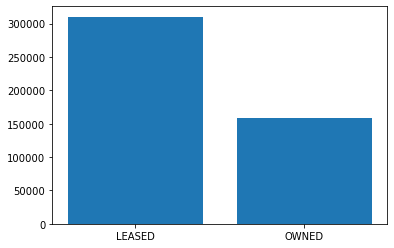

In [130]:
plt.bar(owned_leased.index, owned_leased['Total Parking Spaces'])

# STATES WITH EXCESS PARKING SPACES

### Taking the states as INDEX, categorising the no. of Total Parking Spaces on the basis of BLDG STATUS (whether Active, Decommissioned or Excess):

In [131]:
parking = pd.pivot_table(df, index='Bldg State', columns='Bldg Status', values='Total Parking Spaces')

In [132]:
parking

Bldg Status,ACTIVE,DECOMMISSIONED,EXCESS
Bldg State,,,
AL,62.357724,NaN,59.000000
AR,37.000000,NaN,NaN
AZ,32.256757,NaN,NaN
CA,60.493298,NaN,NaN
CO,78.936709,NaN,22.200000
CT,29.327586,NaN,NaN
DC,41.255144,NaN,NaN
DE,15.750000,NaN,NaN
FL,51.905569,NaN,NaN


### The above dataframe has Aggregate Function (aggfunc) set to 'MEAN' by default. Check by clicking SHIFT+TAB+TAB inside parenthesis.

### Changing the Aggregate Function (aggfunc) to 'SUM ' :

In [142]:
parking = pd.pivot_table(df, index='Bldg State', columns='Bldg Status', values='Total Parking Spaces', aggfunc='sum')

In [143]:
parking

Bldg Status,ACTIVE,DECOMMISSIONED,EXCESS
Bldg State,,,
AL,7670.0,NaN,59.0
AR,3071.0,NaN,NaN
AZ,7161.0,NaN,NaN
CA,45128.0,NaN,NaN
CO,18708.0,NaN,111.0
CT,1701.0,NaN,NaN
DC,20050.0,NaN,NaN
DE,441.0,NaN,NaN
FL,21437.0,NaN,NaN


### Filtering states having EXCESS parking space:

In [144]:
excess_states = parking[parking.EXCESS > 0]

In [145]:
excess_states

Bldg Status,ACTIVE,DECOMMISSIONED,EXCESS
Bldg State,,,
AL,7670.0,NaN,59.0
CO,18708.0,NaN,111.0
IL,10800.0,NaN,21.0
LA,6378.0,NaN,206.0
MD,40528.0,0.0,518.0
MO,23634.0,2446.0,2797.0
NE,2703.0,NaN,19.0
NJ,4375.0,NaN,43.0
NV,3600.0,NaN,173.0


In [147]:
excess_states.EXCESS.count()

11

<AxesSubplot:xlabel='Bldg State'>

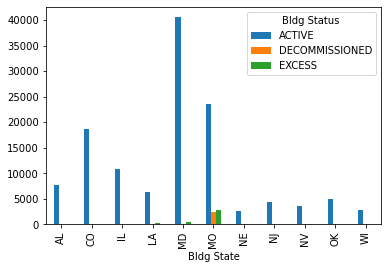

In [148]:
excess_states.plot(kind='bar')

### Plotting the states having EXCESS parking spaces:

<AxesSubplot:xlabel='Bldg State'>

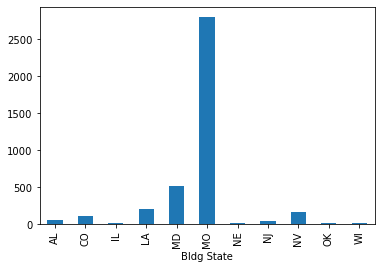

In [149]:
excess_states.EXCESS.plot(kind='bar')

### Plotting the EXCESS states in ascending order:

<AxesSubplot:xlabel='Bldg State'>

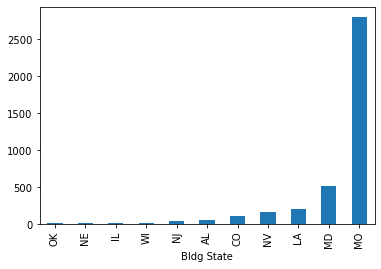

In [150]:
excess_states.EXCESS.sort_values().plot(kind='bar')

### Plotting the EXCESS states in descending order:

<AxesSubplot:xlabel='Bldg State'>

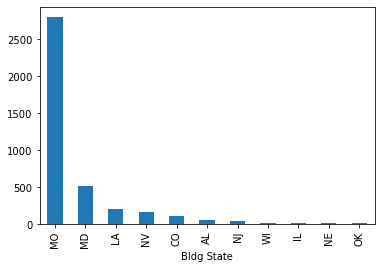

In [151]:
excess_states.EXCESS.sort_values(ascending=False).plot(kind='bar')

### Doing the same, but by using MATPLOTLIB (Look at the complex code):

<BarContainer object of 11 artists>

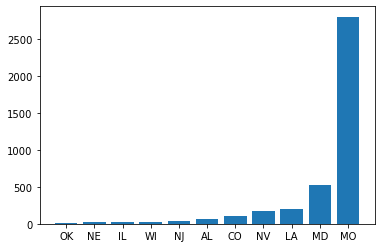

In [152]:
plt.bar(excess_states.EXCESS.sort_values().index, excess_states.EXCESS.sort_values().values)

# CITIES WITH DECOMMISSIONED PARKING SPACES

In [153]:
decom = df[df['Bldg Status']=='DECOMMISSIONED']

In [154]:
decom

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
429,PORTHILL,ID,DECOMMISSIONED,BUILDING,0,OWNED
1933,MOOERS,NY,DECOMMISSIONED,BUILDING,0,OWNED
1934,MOOERS,NY,DECOMMISSIONED,BUILDING,0,OWNED
2338,CURTIS BAY,MD,DECOMMISSIONED,BUILDING,0,OWNED
2348,CURTIS BAY,MD,DECOMMISSIONED,BUILDING,0,OWNED
5716,OVERLAND,MO,DECOMMISSIONED,BUILDING,2089,OWNED
5725,SAINT LOUIS,MO,DECOMMISSIONED,BUILDING,357,OWNED
5726,SAINT LOUIS,MO,DECOMMISSIONED,BUILDING,0,OWNED
6752,FORT WORTH,TX,DECOMMISSIONED,BUILDING,0,OWNED


In [155]:
decom[decom['Total Parking Spaces']>0]

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
5716,OVERLAND,MO,DECOMMISSIONED,BUILDING,2089,OWNED
5725,SAINT LOUIS,MO,DECOMMISSIONED,BUILDING,357,OWNED


# PROPERTY TYPES THAT ARE IN EXCESS

In [156]:
prop = pd.pivot_table(df[df['Bldg Status']=='EXCESS'], index='Property Type', values='Total Parking Spaces', aggfunc='sum')

In [157]:
prop

,Total Parking Spaces
Property Type,
BUILDING,3872
STRUCTURE,111


# ACTIVE PARKING

### Owned or Leased:

In [158]:
active_ol = pd.pivot_table(df[df['Bldg Status']=='ACTIVE'], index='Owned/Leased', values='Total Parking Spaces', aggfunc='sum')

In [159]:
active_ol

,Total Parking Spaces
Owned/Leased,
LEASED,310269
OWNED,151781


In [160]:
active_ol['Total Parking Spaces']/active_ol['Total Parking Spaces'].sum()*100

Owned/Leased
LEASED    67.150525
OWNED     32.849475
Name: Total Parking Spaces, dtype: float64

In [161]:
active_ol['Percentage (%)']=active_ol['Total Parking Spaces']/active_ol['Total Parking Spaces'].sum()*100

In [162]:
active_ol

,Total Parking Spaces,Percentage (%)
Owned/Leased,,
LEASED,310269,67.150525
OWNED,151781,32.849475


In [163]:
active_ol = active_ol.drop(columns=['Percentage (%)'])

In [164]:
active_ol

,Total Parking Spaces
Owned/Leased,
LEASED,310269
OWNED,151781


# STATES WITH MORE LEASED PARKING 

In [165]:
states_leased = pd.pivot_table(df[df['Owned/Leased']=='LEASED'], index='Bldg State', values='Total Parking Spaces', aggfunc='sum')

In [166]:
states_leased.sort_values('Total Parking Spaces', ascending=False).head()

,Total Parking Spaces
Bldg State,
TX,36802
CA,28257
VA,27541
FL,19101
MO,16811


# PROPERTY TYPE WITH MORE ACTIVE PARKING

In [167]:
prop_active = pd.pivot_table(df[df['Bldg Status']=='ACTIVE'], index='Property Type', values='Total Parking Spaces', aggfunc='sum')

In [168]:
prop_active

,Total Parking Spaces
Property Type,
BUILDING,435975
LAND,2293
STRUCTURE,23782


# DISTRIBUTION OF PARKING IN CITY BY PROPERTY TYPE

In [176]:
city_prop = pd.pivot_table(df, index='Bldg City', columns='Property Type', values='Total Parking Spaces', aggfunc='sum')

In [177]:
city_prop

Property Type,BUILDING,LAND,STRUCTURE
Bldg City,,,
ABERDEEN,395.0,NaN,NaN
ABILENE,80.0,NaN,NaN
ABINGDON,38.0,NaN,NaN
ACCOMAC,25.0,NaN,NaN
ADA,40.0,NaN,NaN
...,...,...,...
YUCCA VALLEY,24.0,NaN,NaN
YUMA,299.0,NaN,NaN
ZANESVILLE,75.0,NaN,NaN
